In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('Social_Network_Ads.csv')
dataset=dataset.drop(columns=['User ID','Gender'], axis=1)
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(dataset[['Age','EstimatedSalary']]), columns=['Age','EstimatedSalary'])

In [10]:
y=dataset['Purchased']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

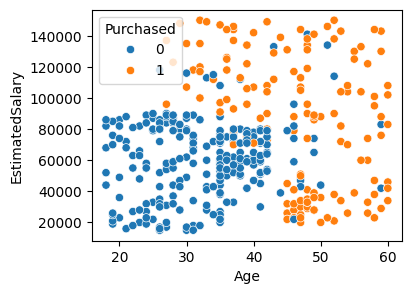

In [14]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='Age', y='EstimatedSalary', data=dataset, hue='Purchased')
plt.show()

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, splitter= 'best')
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [35]:
dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100
# grid serach cv k bagher (99.6875, 83.75) accuarcy ai, ab hm grid serach cv m hyper parameters tunning kr k
# hyper parameters ki bast value ko pick kr k put kryn gy and achi accuarcy get kryn gy



# GridSearchCV n hmy y parameters diye: 'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}, ab hm is pr model ko train
# kryn gy

(91.875, 91.25)

# tuning via GridSearchCV

In [25]:
dicti={"criterion":['gini',"entropy"],
    "splitter":["best", "random"],
    "max_depth":[i for i in range(2,20)]}

In [41]:
2 * 2 * 18     total itny combinations bny gy

72

In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
gd=GridSearchCV(DecisionTreeClassifier(), param_grid=dicti)
# cv s murac cross validation h, yani kitni dfa y kaam ho
gd.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [29]:
gd.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}

In [30]:
gd.best_score_

0.903125

# tuning via RandomizedSearchCV

In [37]:
rs= RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=dicti, n_iter=20 )
# n_iter s murad y h k jo m param_distribution m list od dict jo pass ki h us s parameters k bhhtt saary
# combinations bny gy to an kitny combinatiions ko randomly select krna h

In [38]:
rs.fit(x_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'splitter': ['best', 'random']})

In [39]:
rs.best_params_

{'splitter': 'best', 'max_depth': 6, 'criterion': 'entropy'}

In [40]:
rs.best_score_

0.903125

In [ ]:
ab is n score bhi itna acha nhi btaya nisbatan grid k q k is random selection m un parameters ko select 
nhi kia jin s score bhhttt acha ana tha, but faida y hua k y fast tha